# Multiclass classification - single_model using Naive Bayes(sultan)

# Importing and Preprocessing

## Importing libraries

In [1]:
#### import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from textblob import Word
from textblob import TextBlob

from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

from modAL.models import ActiveLearner
from modAL.models import ActiveLearner

import en_core_web_sm
nlp = en_core_web_sm.load()

%matplotlib inline

# Gathering required features

In [11]:
df = pd.read_pickle("./sultan_features.pkl")
df = df.fillna(0)

In [12]:
short_df = df[['question_id','question','student_answer','student_modified','ref_modified', \
               'grade','length_ratio','aligned_score','aligned_score_demo','cos_similarity','cos_similarity_demo']]
short_df['grades_round']= short_df['grade'].apply(lambda x: round(x))

/home/mohandass/anaconda3/envs/maluuba/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


# Sultan features

In [13]:
X = short_df[['length_ratio','aligned_score','aligned_score_demo','cos_similarity','cos_similarity_demo']]
X[X<0] = 0
Y = short_df['grades_round'].values
X = np.array(X)

/home/mohandass/anaconda3/envs/maluuba/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/mohandass/anaconda3/envs/maluuba/lib/python3.6/site-packages/pandas/core/frame.py:3163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._where(-key, value, inplace=True)


# Seeding

In [14]:
#getting the seed index
classes = short_df['grades_round'].unique()
seed_index = []
for i in classes:
    seed_index.append(short_df['grades_round'][short_df['grades_round']==i].index[0])
seed_index

[0, 1, 4, 5, 52, 94]

In [15]:
act_data = short_df.copy()
accuracy_list = []

# initialising
train_idx = seed_index
X_train = X[train_idx]
y_train = Y[train_idx]
 
# generating the pool
X_pool = np.delete(X, train_idx, axis=0)
y_pool = np.delete(Y, train_idx)

act_data = act_data.drop(axis=0,index = train_idx)
act_data.reset_index(drop = True,inplace=True)


# initializing the active learner
# nb = LogisticRegression()
nb = MultinomialNB()
learner = ActiveLearner(
#     estimator = lr,
    estimator = nb,
#     estimator = RandomForestClassifier(n_estimators=5),
#     estimator=KNeighborsClassifier(n_neighbors=3),
    X_training=X_train, y_training=y_train
)

# pool-based sampling
n_queries = int(len(X)/6)
for idx in range(n_queries):
    query_idx, query_instance = learner.query(X_pool)
#     print("\nQ: ", act_data.loc[int(query_idx),'question'])
#     print("A: ",act_data.loc[int(query_idx),'student_answer'])
#     print("Actual grade: ",y_pool[query_idx].reshape(1, ))
#     print ("Class probabilities: ",learner.predict_proba(X_pool[query_idx].reshape(1, -1)))
#     human_label = int(input("\nGive me a grade 0 or 1:"))
    
    learner.teach(
        X=X_pool[query_idx].reshape(1, -1),
        y=y_pool[query_idx].reshape(1, )
    )
    
    # remove queried instance from pool
    X_pool = np.delete(X_pool, query_idx, axis=0)
    y_pool = np.delete(y_pool, query_idx)
    
    act_data = act_data.drop(axis=0,index = query_idx)
    act_data.reset_index(drop=True, inplace=True)
    
    accuracy_list.append(learner.score(X,Y))
    print('Accuracy after query no. %d: %f' % (idx+1, learner.score(X_pool, y_pool)))
print("======================================")
print("By just labelling ",round(n_queries*100.0/len(X),2),"% of total data accuracy of ", round(learner.score(X_pool, y_pool),3), " % is achieved on the unseen data"  )

Accuracy after query no. 1: 0.294456
Accuracy after query no. 2: 0.414133
Accuracy after query no. 3: 0.445540
Accuracy after query no. 4: 0.484786
Accuracy after query no. 5: 0.420814
Accuracy after query no. 6: 0.451029
Accuracy after query no. 7: 0.417456
Accuracy after query no. 8: 0.417628
Accuracy after query no. 9: 0.417800
Accuracy after query no. 10: 0.445177
Accuracy after query no. 11: 0.445361
Accuracy after query no. 12: 0.464109
Accuracy after query no. 13: 0.464300
Accuracy after query no. 14: 0.464905
Accuracy after query no. 15: 0.476663
Accuracy after query no. 16: 0.493388
Accuracy after query no. 17: 0.484084
Accuracy after query no. 18: 0.487593
Accuracy after query no. 19: 0.486140
Accuracy after query no. 20: 0.481374
Accuracy after query no. 21: 0.481573
Accuracy after query no. 22: 0.475145
Accuracy after query no. 23: 0.484045
Accuracy after query no. 24: 0.485489
Accuracy after query no. 25: 0.485276
Accuracy after query no. 26: 0.485892
Accuracy after query 

Accuracy after query no. 251: 0.508924
Accuracy after query no. 252: 0.509158
Accuracy after query no. 253: 0.509391
Accuracy after query no. 254: 0.509624
Accuracy after query no. 255: 0.509858
Accuracy after query no. 256: 0.510092
Accuracy after query no. 257: 0.510326
Accuracy after query no. 258: 0.510560
Accuracy after query no. 259: 0.510795
Accuracy after query no. 260: 0.511029
Accuracy after query no. 261: 0.511264
Accuracy after query no. 262: 0.511500
Accuracy after query no. 263: 0.511735
Accuracy after query no. 264: 0.511510
Accuracy after query no. 265: 0.511746
Accuracy after query no. 266: 0.511521
Accuracy after query no. 267: 0.511757
Accuracy after query no. 268: 0.511993
Accuracy after query no. 269: 0.512229
Accuracy after query no. 270: 0.512465
Accuracy after query no. 271: 0.512702
Accuracy after query no. 272: 0.512939
Accuracy after query no. 273: 0.513176
Accuracy after query no. 274: 0.513414
Accuracy after query no. 275: 0.513651
Accuracy after query no. 

## Regular supervised task

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
check_X = np.copy(X)
check_Y = np.copy(Y)

X_train,X_test,Y_train,Y_test = train_test_split(check_X,check_Y,test_size = 0.2)

In [18]:
# logisticRegr = LogisticRegression()
nb.fit(X_train, Y_train)
score = nb.score(X_test, Y_test)

print(score)

0.4723926380368098


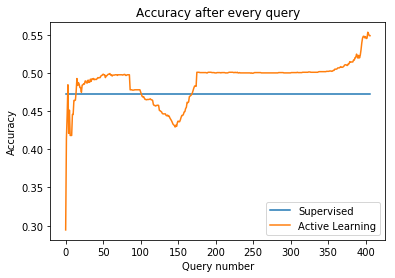

In [19]:
supervised_accuracy = [score for x in range(0,n_queries)]

plt.figure()
plt.plot(np.linspace(0,n_queries-1,n_queries),supervised_accuracy)
plt.plot(accuracy_list)
plt.title("Accuracy after every query")
plt.xlabel("Query number")
plt.ylabel("Accuracy")
plt.legend(["Supervised", "Active Learning"], loc="lower right")
plt.show()